# Team Members
    
    Abijith M G
    Shripad Hegde
    Anand P
    Christy Joseph
   

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import pymysql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Connecting Server

In [2]:
db_host = '18.136.56.185'
username = 'dm_team2'
user_pass = 'dm_team1118#'
db_name = 'project_sales'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['data']

# Importing Data

In [3]:
query="select * from data;"
data=pd.read_sql(query,conn)
data.head(15)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


# Exploratory Data Analysis

In [181]:
data.shape

(7422, 9)

In [182]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [183]:
data.head(75)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
70,12-11-2018 17:23,18,Website,902XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-11,Chennai,Mode-1,Potential
71,12-11-2018 15:25,9,Live Chat-Direct,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-9,UAE,Mode-3,In Progress Positive
72,12-11-2018 15:21,19,Website,974XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-1,In Progress Positive
73,12-11-2018 15:19,9,Call,937XXXXXXX,jXXXXXXX@yahoo.com,Sales-Agent-7,Hyderabad,Mode-1,In Progress Positive


In [96]:
# Looking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
Created          7422 non-null object
Product_ID       7422 non-null object
Source           7422 non-null object
Mobile           7422 non-null object
EMAIL            7422 non-null object
Sales_Agent      7422 non-null object
Location         7422 non-null object
Delivery_Mode    7422 non-null object
Status           7422 non-null object
dtypes: object(9)
memory usage: 522.0+ KB


In [97]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [98]:
# Dropping the columns which are of no use in analysis
data.drop(['Mobile'],axis=1,inplace=True)
data.drop(['EMAIL'],axis=1,inplace=True)
data.drop(['Created'],axis=1,inplace=True)

In [99]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open


In [100]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    # Dropping rows with missing data because they are few
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.shape

(7328, 6)

In [101]:
data.describe()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
count,7328,7328,7328,7328,7328,7328
unique,29,25,11,17,5,11
top,18,Call,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,1706,2536,1495,2481,2903,1532


In [102]:
data['Status'].value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [103]:
# Compressing and Merging the labels in column
data.Source.replace(['Live Chat-Google Organic','Live Chat-Direct','Live Chat-Blog','Live Chat-PPC',
                   'Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-CPC',
                   'Live Chat-Quora','Live Chat-Youtube','Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [104]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [105]:
data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [106]:
#Defining 'Status' as 'Good' or 'Bad'
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [107]:
data.head(10)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,Good
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good
5,18,Live Chat,Sales-Agent-9,Other Locations,Mode-3,Bad
6,27,Call,Sales-Agent-11,Chennai,Mode-5,Good
7,19,Live Chat,Sales-Agent-4,Foreign,Mode-2,Good
8,19,Live Chat,Sales-Agent-4,Foreign,Mode-4,Bad
9,18,Call,Sales-Agent-7,Bangalore,Mode-1,Bad


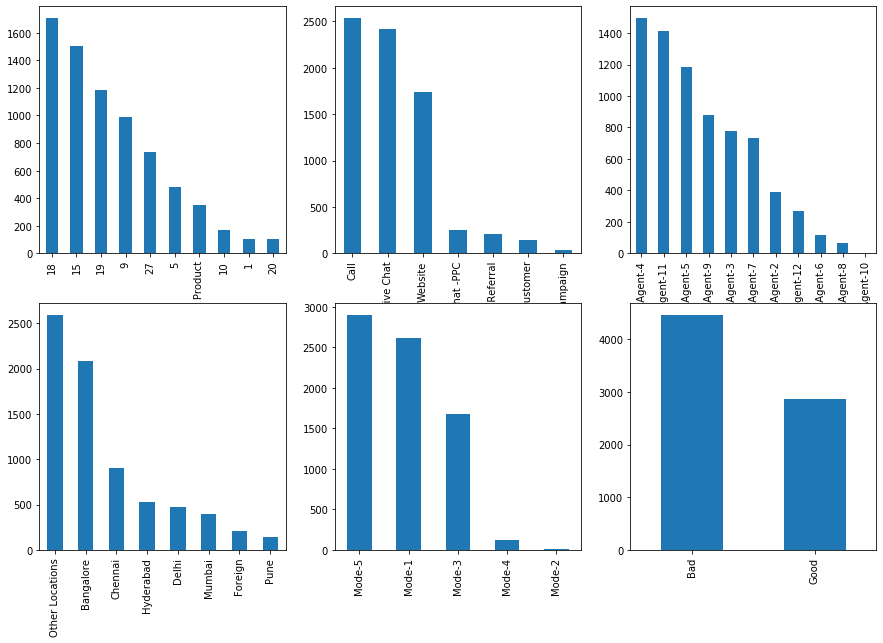

In [108]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
data.Product_ID.value_counts().plot(kind='bar')
plt.subplot(2,3,2)
data.Source.value_counts().plot(kind='bar')
plt.subplot(2,3,3)
data.Sales_Agent.value_counts().plot(kind='bar')
plt.subplot(2,3,4)
data.Location.value_counts().plot(kind='bar')
plt.subplot(2,3,5)
data.Delivery_Mode.value_counts().plot(kind='bar')
plt.subplot(2,3,6)
data.Status.value_counts().plot(kind='bar')

# Data Processing

In [109]:
# Label encoding all the columns
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,8,4,4,0,0,1
1,4,0,5,6,4,1
2,3,6,1,6,0,1
3,2,6,8,4,0,0
4,3,0,8,0,0,1


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
Product_ID       7328 non-null int32
Source           7328 non-null int32
Sales_Agent      7328 non-null int32
Location         7328 non-null int32
Delivery_Mode    7328 non-null int32
Status           7328 non-null int32
dtypes: int32(6)
memory usage: 171.9 KB


In [111]:
# Checking the correlation coeffecient
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.059619,0.056065,-0.226961,-0.181464,0.138943
Source,0.059619,1.000000,-0.029715,0.012592,-0.197923,-0.024830
Sales_Agent,0.056065,-0.029715,1.000000,-0.140876,-0.224688,0.137074
Location,-0.226961,0.012592,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.181464,-0.197923,-0.224688,0.414193,1.000000,-0.220445
Status,0.138943,-0.024830,0.137074,-0.347418,-0.220445,1.000000


In [112]:
y = data.Status
X = data.iloc[:,[0,1,2,3,4]]

In [113]:
# Splitting into training and testing data for accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [114]:
X_train.shape

(5129, 5)

In [115]:
X_test.shape

(2199, 5)

In [116]:
# SMOTE for sampling technique
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

In [117]:
X_train.shape

(6214, 5)

In [118]:
X_test.shape

(2199, 5)

# Models

# 1. Logistic Regression

In [119]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [121]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))


0.6634834015461574
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1359
           1       0.55      0.66      0.60       840

    accuracy                           0.66      2199
   macro avg       0.65      0.66      0.65      2199
weighted avg       0.68      0.66      0.67      2199



In [122]:
print(confusion_matrix(y_test,y_predict_log))

[[904 455]
 [285 555]]


# ROC AUC

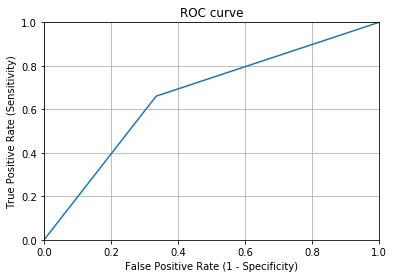

0.6629546410175549


array([2, 1, 0])

In [123]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_log)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print(metrics.roc_auc_score(y_test,y_predict_log))
thresholds

# 2. Naive Bayes

In [128]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [129]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [130]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.6380172805820827
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1359
           1       0.53      0.54      0.53       840

    accuracy                           0.64      2199
   macro avg       0.62      0.62      0.62      2199
weighted avg       0.64      0.64      0.64      2199



In [131]:
print(confusion_matrix(y_test,y_predict_nb))

[[949 410]
 [386 454]]


# 3. K-Nearest Neighbors

In [132]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [133]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [134]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))


0.6839472487494316
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1359
           1       0.59      0.56      0.58       840

    accuracy                           0.68      2199
   macro avg       0.66      0.66      0.66      2199
weighted avg       0.68      0.68      0.68      2199



In [135]:
print(confusion_matrix(y_test,y_predict_knn))

[[1033  326]
 [ 369  471]]


# 4. Support Vector Machine

In [136]:
#Training the model
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', C = 1, gamma = 1)
model_svm.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [137]:
# Predicting the model
y_predict_svm = model_svm.predict(X_test)

In [138]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.6825829922692133
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1359
           1       0.58      0.64      0.61       840

    accuracy                           0.68      2199
   macro avg       0.67      0.68      0.67      2199
weighted avg       0.69      0.68      0.69      2199



In [139]:
print(confusion_matrix(y_test,y_predict_svm))

[[960 399]
 [299 541]]


# 5. XGBoost Classifier

In [155]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=450,max_depth=15,gamma=5,learning_rate=0.01,random_state=5)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=450, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [156]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [157]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.7007730786721237
              precision    recall  f1-score   support

           0       0.78      0.71      0.75      1359
           1       0.59      0.68      0.64       840

    accuracy                           0.70      2199
   macro avg       0.69      0.70      0.69      2199
weighted avg       0.71      0.70      0.70      2199



In [158]:
print(confusion_matrix(y_test,y_predict_xgb))

[[968 391]
 [267 573]]


# 6. Random Forest

In [159]:
# Training the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=23, n_jobs=None,
                                              oob_score=False, random_state=33,
                                  

In [163]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5}

In [164]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [165]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.6912232833105957
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1359
           1       0.59      0.63      0.61       840

    accuracy                           0.69      2199
   macro avg       0.68      0.68      0.68      2199
weighted avg       0.70      0.69      0.69      2199



In [166]:
print(confusion_matrix(y_test,y_predict_rf))

[[994 365]
 [314 526]]


# 7. Decision Tree

In [167]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dt=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,4,6,10],'criterion':['gini']},{'min_samples_split':[2,4,6,10],'criterion':['entropy']}]

model_dtree=GridSearchCV(estimator=classifier_dt, param_grid=parameters, scoring='accuracy',cv=10)
model_dtree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini'],
                          'min

In [168]:
model_dtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 2}

In [169]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [170]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.6966803092314688
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1359
           1       0.60      0.61      0.60       840

    accuracy                           0.70      2199
   macro avg       0.68      0.68      0.68      2199
weighted avg       0.70      0.70      0.70      2199



In [171]:
print(confusion_matrix(y_test,y_predict_dtree))

[[1022  337]
 [ 330  510]]


# 8. Artificial Neural Network

In [172]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_ann = MLPClassifier(learning_rate_init= 0.1, hidden_layer_sizes= (90), random_state = 10)
model_ann.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=90, learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [173]:
# Predicting the model
y_predict_ann = model_ann.predict(X_test)

In [174]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_ann))
print(classification_report(y_test,y_predict_ann))

0.6502955889040473
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1359
           1       0.53      0.66      0.59       840

    accuracy                           0.65      2199
   macro avg       0.64      0.65      0.64      2199
weighted avg       0.67      0.65      0.65      2199



In [175]:
print(confusion_matrix(y_test,y_predict_ann))

[[878 481]
 [288 552]]


In [176]:
# Exporting the trained model
from sklearn.externals import joblib
joblib.dump(model_xgb,'FicZon_SalesEff.ml')

['FicZon_SalesEff.ml']